In [65]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [66]:
df=pd.read_csv("voice.csv")
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [67]:
print(df.isnull())

      meanfreq     sd  median    Q25    Q75    IQR   skew   kurt  sp.ent  \
0        False  False   False  False  False  False  False  False   False   
1        False  False   False  False  False  False  False  False   False   
2        False  False   False  False  False  False  False  False   False   
3        False  False   False  False  False  False  False  False   False   
4        False  False   False  False  False  False  False  False   False   
...        ...    ...     ...    ...    ...    ...    ...    ...     ...   
3163     False  False   False  False  False  False  False  False   False   
3164     False  False   False  False  False  False  False  False   False   
3165     False  False   False  False  False  False  False  False   False   
3166     False  False   False  False  False  False  False  False   False   
3167     False  False   False  False  False  False  False  False   False   

        sfm  ...  centroid  meanfun  minfun  maxfun  meandom  mindom  maxdom  \
0     F

In [68]:
print(df.shape)

(3168, 21)


## 1)Remove/handle null values (if any)

In [69]:
print(df.isnull().sum())

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64


In [70]:
print(df.dtypes)

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object


In [71]:
print(df.columns)

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')


In [72]:
r1=df["label"].value_counts() 
print(r1)
print(r1.index)
print(r1.values)

male      1584
female    1584
Name: label, dtype: int64
Index(['male', 'female'], dtype='object')
[1584 1584]


## 2)Depict percentage distribution of label on a pie chart

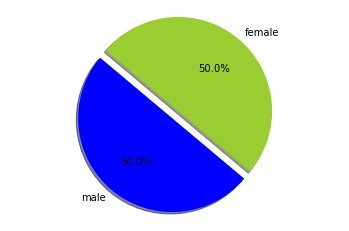

In [73]:
labels = r1.index
sizes = r1
colors = ['blue', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()


In [74]:
x=df.iloc[:,:-1]
y=df['label']


In [75]:
x.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [76]:
y.head()

0    male
1    male
2    male
3    male
4    male
Name: label, dtype: object

#### 3)Considering all the features as independent feature and label as dependent feature,split the dataset training and testing data with test size=20%

In [5]:
from sklearn.model_selection import train_test_split

In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=20)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3148, 20)
(20, 20)
(3148,)
(20,)


### classifier models on training dataset and generate predictions for the test dataset

### A) DecisionTreeClassifier

In [79]:
from sklearn.tree import DecisionTreeClassifier


In [80]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [1]:
def mscore(model):
    print('Training Score',model.score(x_train,y_train))
    print('Testing Score',model.score(x_test,y_test))

def gen_matrix(y_test,y_pred):
    print(cm)
    cm  = confusion_matrix(y_test,y_pred)
    print(classification_report(y_test,y_pred))
    print('Accyracy Score',accuracy_score(y_test,y_pred))

In [82]:
m2 = DecisionTreeClassifier(criterion='gini',min_samples_split=15,max_depth=10)
m2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=15)

#### mscore in DecisionTreeClassifier

In [83]:
mscore(m2)

Training Score 0.991423125794155
Testing Score 0.95


In [84]:
ypred_m2 = m2.predict(x_test)
print(ypred_m2)

['male' 'female' 'female' 'female' 'male' 'female' 'male' 'female'
 'female' 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'female'
 'male' 'female' 'male']


#### Accuracy Score DecisionTreeClassifier

In [85]:
gen_matrix(y_test,ypred_m2)


[[10  0]
 [ 1  9]]
              precision    recall  f1-score   support

      female       0.91      1.00      0.95        10
        male       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20

Accyracy Score 0.95


## B)RandomForestClassifier 

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
m5 = RandomForestClassifier(n_estimators=150,criterion='gini',max_depth=8,min_samples_split=20)
m5.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_split=20, n_estimators=150)

#### mscore for RandomForestClassifier

In [88]:
mscore(m5)

Training Score 0.9876111817026684
Testing Score 0.9


In [89]:
ypred_m5 = m5.predict(x_test)
print(ypred_m5)

['male' 'female' 'female' 'female' 'male' 'female' 'male' 'female'
 'female' 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'female'
 'male' 'male' 'male']


#### Accuracy Score for RandomForestClassifier

In [90]:
gen_matrix(y_test,ypred_m5)

[[9 1]
 [1 9]]
              precision    recall  f1-score   support

      female       0.90      0.90      0.90        10
        male       0.90      0.90      0.90        10

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20

Accyracy Score 0.9


## C)KNN Classifier

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
m3 = KNeighborsClassifier(n_neighbors=9)
m3.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

#### mScore for KNN Classifier

In [93]:
mscore(m3)

Training Score 0.7716010165184244
Testing Score 0.65


In [94]:
ypred_m3 = m3.predict(x_test)
print(ypred_m3)

['male' 'female' 'female' 'female' 'female' 'male' 'male' 'female'
 'female' 'male' 'male' 'female' 'male' 'male' 'female' 'female' 'female'
 'female' 'male' 'male']


#### Accuracy Score for KNN Classifier

In [95]:
gen_matrix(y_test,ypred_m3)

[[7 3]
 [4 6]]
              precision    recall  f1-score   support

      female       0.64      0.70      0.67        10
        male       0.67      0.60      0.63        10

    accuracy                           0.65        20
   macro avg       0.65      0.65      0.65        20
weighted avg       0.65      0.65      0.65        20

Accyracy Score 0.65


## d. Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression


In [97]:
m1 = LogisticRegression(max_iter=1000)
m1.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

#### mscore for logical regression

In [98]:
mscore(m1)

Training Score 0.9174078780177891
Testing Score 0.9


In [99]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

['male' 'female' 'female' 'female' 'male' 'female' 'male' 'female'
 'female' 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'female'
 'male' 'male' 'male']


#### Accuracy Score for logical regression

In [100]:
gen_matrix(y_test,ypred_m1)

[[9 1]
 [1 9]]
              precision    recall  f1-score   support

      female       0.90      0.90      0.90        10
        male       0.90      0.90      0.90        10

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20

Accyracy Score 0.9


## SVM Classifier

In [101]:
from sklearn.svm import SVC


In [102]:
m4 = SVC(kernel='linear',C=10)   #'rbf','poly'
m4.fit(x_train,y_train)

SVC(C=10, kernel='linear')

#### mscore for svm 

In [103]:
mscore(m4)

Training Score 0.9736340533672173
Testing Score 0.9


In [104]:
ypred_m4 = m4.predict(x_test)
print(ypred_m4)

['male' 'female' 'female' 'female' 'male' 'female' 'male' 'female'
 'female' 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'female'
 'male' 'male' 'male']


#### Accuracy Score for svm

In [105]:
gen_matrix(y_test,ypred_m4)

[[9 1]
 [1 9]]
              precision    recall  f1-score   support

      female       0.90      0.90      0.90        10
        male       0.90      0.90      0.90        10

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20

Accyracy Score 0.9


##  6)Report the model with the best accuracy.

i)Accuracy Score for DecisionTreeClassifier is      0.85 <br>
ii)Accuracy Score for RandomForestClassifier is     0.95 <br>
iii)Accuracy Score for KNN Classifier is            0.55 <br>
iv)Accuracy Score for Logistic Regression is        0.9 <br>
v)Accuracy Score for svm is                         1.0 <br>

Therefore we conclude that svm have best Accuracy score 